In [2]:
from IPython.display import Image
import numpy as np
import matplotlib.pyplot as plt

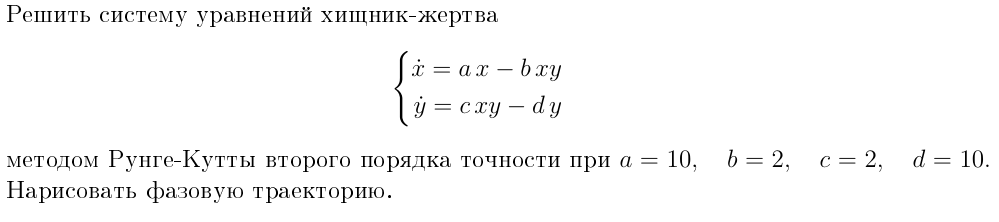

In [3]:
Image('task 7.png')

In [4]:
a = 10
b = 2
c = 2
d = 10

dx = lambda x, y: a*x - b*x*y
dy = lambda x, y: c*x*y - d*y

f = lambda x, y: np.array([dx(x, y), dy(x, y)])   # 2x2 equation system

In [5]:
def RK2(r0, step, count, coef=3./4):
    r = [r0]
    for i in range(count+1):
        k1 = r[i] + step * f(r[i][0], r[i][1]) / (2 * coef)
        r.append(r[i] + step * ((1 - coef) * f(r[i][0], r[i][1]) + coef * f(k1[0], k1[1])))
    r = np.array(r).transpose()
    return r

Population equilibrium can be found from:
$$ \large
\begin{cases}
    \dot{x} = ax - bxy = 0 \\
    \dot{y} = cxx - dy = 0
\end{cases}
$$

So, equilibrium points are:
$$\large
    \left \{x = 0,\ y = 0 \right \} \\
    \left \{x =\frac{a}{b},\ y =\frac{d}{c} \right \}
$$

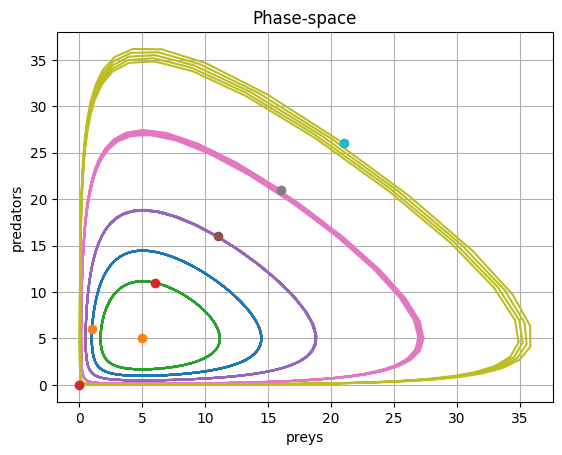

In [11]:
t_0 = 0

t_from = 0
t_to = 5

N = 500
h = (t_to-t_from)/N

r_from = 1
r_to = 25
r_step = 5


R = [[i, i+5] for i in range(r_from, r_to, r_step)]

R.append([a/b, d/c])
R.append([0, 0])

for r0 in R:
    x, y = RK2(r0, h, N)
    plt.plot(x, y, '-')
    plt.plot(r0[0], r0[1], 'o')

plt.grid()
# plt.xlim([r_from-2, r_to+10])
# plt.ylim([r_from-2, r_to+10])
plt.xlabel('preys')
plt.ylabel('predators')
plt.title('Phase-space')
plt.show()

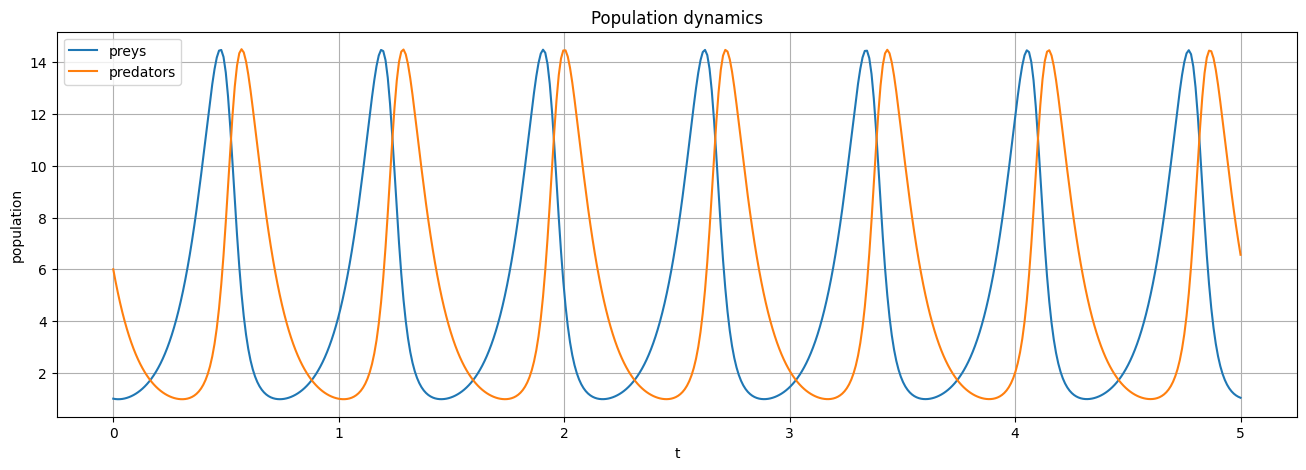

In [7]:
plt.figure(figsize=(16, 5))

t = np.linspace(t_from, t_to, N+2)
x, y = RK2(R[0], h, N)

plt.plot(t, x, label='preys')
plt.plot(t, y, label='predators')

plt.legend(loc=0)
plt.grid()
plt.xlabel('t')
plt.ylabel('population')
plt.title('Population dynamics')
plt.show()

Convergence condition:
Abs value of all the eigenvalues of $h\^J$ are less than 1.

$$
h\^J =
\left(
\begin{matrix}
h(a-by) && 0 \\
0 && h(cx-d)
\end{matrix}
\right)
$$

So:
$$
h<0.01 => N > 100*L
$$